In [96]:
#Did the Extra Credit with Solve_IVP
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Problem 1

The odeint solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [97]:
def predator_prey(y, t):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    #Return the right side of the wolf rabbit equation
    r = lambda x: x[0]*(1-.5*x[1])
    w = lambda x: x[1]*(-.75+.25*x[0])
    return((r(y),w(y)))
    pass

#for solve_ivp
predator_prey2 = lambda t,y: predator_prey(y,t)

# Problem 2

Use odeint to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of odeint) on the same plot.

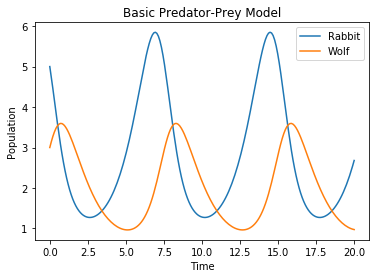

In [98]:
#Initialize the plots and initial values
plt.figure(1)
y0 = np.array([5,3])
t = np.linspace(0,20,200)
sol = odeint(predator_prey,y0,t)

#Set the plot and all the attributes
plt.plot(t,sol[:,0],label='Rabbit')
plt.plot(t,sol[:,1],label='Wolf')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Basic Predator-Prey Model')
plt.legend()
plt.show()

# Problem 3

Similar to problem 1, define the function Lotka_volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using odeint, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

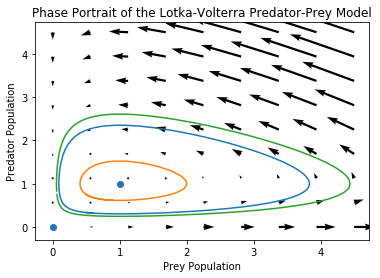

In [99]:
plt.figure(2)

def Lotka_Volterra(y, t):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    #Implement lotka volterra equation
    u = y[0]
    v = y[1]
    return((u*(1-v),1/3*v*(u-1)))
    pass

#Equation for solve_vip
Lotka_Volterra2= lambda t,y: Lotka_Volterra(y,t)
  
#Get all the solutions using odeint
t = np.linspace(0,13,260)
sol1 = odeint(Lotka_Volterra,np.array([1/2,1/3]),t)
sol2 = odeint(Lotka_Volterra,np.array([1/2,3/4]),t)
sol3 = odeint(Lotka_Volterra,np.array([1/16,3/4]),t)
           
# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
plt.scatter([0,1],[0,1])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Lotka-Volterra Predator-Prey Model')
plt.plot(sol1[:,0],sol1[:,1])
plt.plot(sol2[:,0],sol2[:,1])
plt.plot(sol3[:,0],sol3[:,1])

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use odeint to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

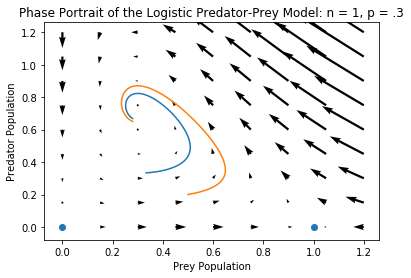

In [100]:
plt.figure(3)

def Logistic_Model(y, t):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    #Implement the logistic model equation
    u = y[0]
    v = y[1]
    return((u*(1-u-v),n*v*(u-p)))
    pass

#Function for using solve_ivp
Logistic_Model2 = lambda t,y: Logistic_Model(y,t)

#Set the parameters and solve
n = 1
p = .3
t = np.linspace(0,13,200)
sol1 = odeint(Logistic_Model,np.array([1/3,1/3]),t)
sol2 = odeint(Logistic_Model,np.array([1/2,1/5]),t)

#Set Up the Phase Plane
Y1, Y2 = np.meshgrid(np.linspace(0,1.2,25), np.linspace(0,1.2,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q1 = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Graph all the functions
plt.plot(sol1[:,0],sol1[:,1])
plt.plot(sol2[:,0],sol2[:,1])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Logistic Predator-Prey Model: n = 1, p = .3')
plt.scatter([0,1],[0,0])

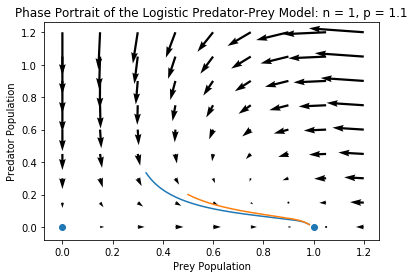

In [101]:
plt.figure(4)

#Change rho and solve again
p = 1.1
sol3 = odeint(Logistic_Model,np.array([1/3,1/3]),t)
sol4 = odeint(Logistic_Model,np.array([1/2,1/5]),t)

#Set the phase plane
Y1, Y2 = np.meshgrid(np.linspace(0,1.2,25), np.linspace(0,1.2,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q2 = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Graph Again
plt.scatter([0,1],[0,0])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Logistic Predator-Prey Model: n = 1, p = 1.1')
plt.plot(sol3[:,0],sol3[:,1])
plt.plot(sol4[:,0],sol4[:,1])

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbeâ€™s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [102]:
def forbes(F):
    #Set up the forbes equation from the text
    pf = 9400
    pl = 1800
    c= 10.4*pl/pf
    forb_eq = c/(c+F)
    return(forb_eq)

def energy_balance(F,L,pal,ei,K):
    #Set al the parameters
    pf = 9400
    pl = 1800
    gf = 3.2
    gl = 22
    nf = 180
    nl = 230
    B = .14
    
    #Get and return the energy balance
    p = forbes(F)
    Eb = ((1/pal-B)*ei - K-gf*F-gl*L)/(nf/pf*(1-p)+nl/pl*p+1/pal)
    return(Eb)
    
def weight_odesystem(y,t):
    #Set the parameters
    pf = 9400
    pl = 1800
    F = y[0]
    L = y[1]
    
    #Use the function in the text to get the energy balance
    p = forbes(F)
    eb = energy_balance(F,L,pal,ei,K)
    return(((1-p)*eb/pf, p*eb/pl))

def find_k(F,L,pal,ei):
    #Set the parameters and find k
    B= .14
    gf = 3.2
    gl = 22
    return((1/pal-B)*ei - gf*F - gl*L)

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1âˆ’p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW âˆ’ F_0$.

Suppose a 38 year old female, standing 5â€™8â€ and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use odeint to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

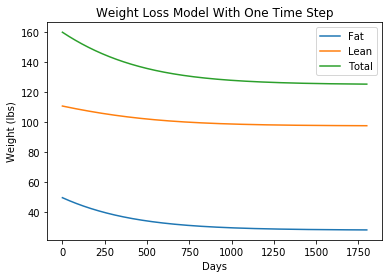

In [103]:
plt.figure(5)

# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

#A function for converting from kilos to lbs
def kilo_to_lb(x):
    return(x*2.20462)
  
#Set all the parameters
bw = 72.575
age = 38
H = 1.7272
sex = 'female'

#Get the fat mass to get the initital value and K
fm = fat_mass(bw,age,H,sex)
y0 = [fm,bw-fm]
K = find_k(y0[0],y0[1],1.4,2143)

#Set more parameters
pal = 1.5
ei = 2025
t = np.arange(0,1801)

#Solve the system and plot
sol = odeint(weight_odesystem,y0,t)
plt.plot(t, kilo_to_lb(sol[:,0]), label = 'Fat')
plt.plot(t,kilo_to_lb(sol[:,1]), label = 'Lean')
plt.plot(t,kilo_to_lb(np.sum(sol,axis=1)),label='Total')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss Model With One Time Step')
plt.legend()
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

[14.59725519 45.74013613]


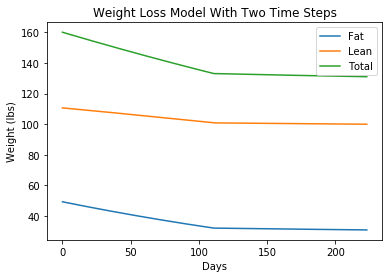

In [104]:
plt.figure(6)
#Set the parameters, using the same y0 as before
t = np.arange(0,112)
pal = 1.7
ei = 1600

#Get the first stage of weight loss solution
sol1 = odeint(weight_odesystem,y0,t)
pal = 1.5
ei = 2025
#w = np.sum(sol1,axis=1)[-1]
y0 = sol1[-1]
print(y0)

#Get hte next stage of weight loss
sol2 = odeint(weight_odesystem,y0,t)
sol = np.vstack((sol1,sol2))
full_time = np.arange(0,224)

#Plot
plt.plot(full_time, kilo_to_lb(sol[:,0]), label = 'Fat')
plt.plot(full_time,kilo_to_lb(sol[:,1]), label = 'Lean')
plt.plot(full_time,kilo_to_lb(np.sum(sol,axis=1)),label='Total')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss Model With Two Time Steps')
plt.legend()
plt.show()

## Using Solve_IVP

## Prob 2

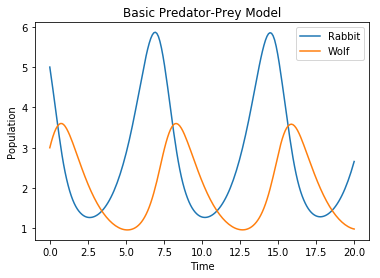

In [105]:
#Initialize the plots and initial values
plt.figure(7)
y0 = np.array([5,3])
t = np.linspace(0,20,200)
sol_ob = solve_ivp(predator_prey2,[0,20],y0,t_eval=t)

#Set the plot and all the attributes
plt.plot(sol_ob.t,sol_ob.y[0],label='Rabbit')
plt.plot(sol_ob.t,sol_ob.y[1],label='Wolf')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Basic Predator-Prey Model')
plt.legend()
plt.show()

## Prob 3

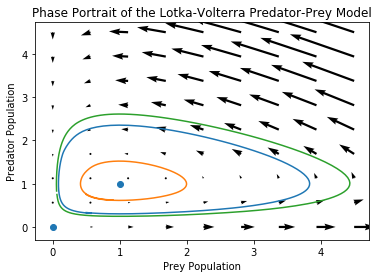

In [106]:
plt.figure(8)

#Get all the solutions using solve_ivp
t = np.linspace(0,13,260)
sol1 = solve_ivp(Lotka_Volterra2,[0,13],np.array([1/2,1/3]),t_eval=t)
sol2 = solve_ivp(Lotka_Volterra2,[0,13],np.array([1/2,3/4]),t_eval=t)
sol3 = solve_ivp(Lotka_Volterra2,[0,13],np.array([1/16,3/4]),t_eval=t)
           
# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Label the Plot
plt.scatter([0,1],[0,1])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Lotka-Volterra Predator-Prey Model')
plt.plot(sol1.y[0],sol1.y[1])
plt.plot(sol2.y[0],sol2.y[1])
plt.plot(sol3.y[0],sol3.y[1])

## Prob 4

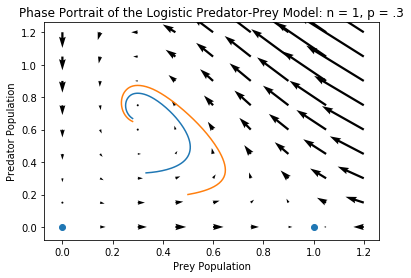

In [107]:
plt.figure(9)


#Set the parameters and solve
n = 1
p = .3
t = np.linspace(0,13,200)
sol1 = solve_ivp(Logistic_Model2,[0,20],np.array([1/3,1/3]),t_eval=t)
sol2 = solve_ivp(Logistic_Model2,[0,20],np.array([1/2,1/5]),t_eval=t)

#Set Up the Phase Plane
Y1, Y2 = np.meshgrid(np.linspace(0,1.2,25), np.linspace(0,1.2,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q1 = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Graph all the functions
plt.plot(sol1.y[0],sol1.y[1])
plt.plot(sol2.y[0],sol2.y[1])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Logistic Predator-Prey Model: n = 1, p = .3')
plt.scatter([0,1],[0,0])

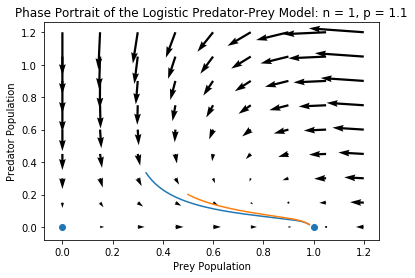

In [108]:
plt.figure(10)

#Change rho and solve again
p = 1.1
sol3 = solve_ivp(Logistic_Model2,[0,20],np.array([1/3,1/3]),t_eval=t)
sol4 = solve_ivp(Logistic_Model2,[0,20],np.array([1/2,1/5]),t_eval=t)

#Set the phase plane
Y1, Y2 = np.meshgrid(np.linspace(0,1.2,25), np.linspace(0,1.2,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q2 = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Graph Again
plt.scatter([0,1],[0,0])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Logistic Predator-Prey Model: n = 1, p = 1.1')
plt.plot(sol3.y[0],sol3.y[1])
plt.plot(sol4.y[0],sol4.y[1])

## Prob 6

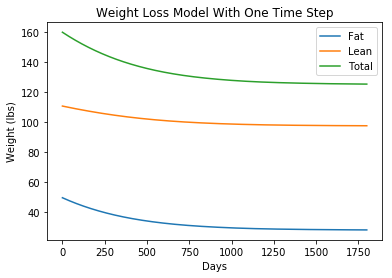

In [109]:
plt.figure(11)

#Function for solve_ivp
weight_odesystem2 = lambda t,y: weight_odesystem(y,t)

#Set the parameters
bw = 72.575
age = 38
H = 1.7272
sex = 'female'

#Get the fat mass for y0 and K
fm = fat_mass(bw,age,H,sex)
y0 = [fm,bw-fm]
K = find_k(y0[0],y0[1],1.4,2143)

#Set more parameters
pal = 1.5
ei = 2025
t = np.arange(0,1801)

#Solve the system using solve_ivp and plot
sol = solve_ivp(weight_odesystem2,[0,1800],y0,t_eval=t)
plt.plot(t, kilo_to_lb(sol.y[0]), label = 'Fat')
plt.plot(t,kilo_to_lb(sol.y[1]), label = 'Lean')
plt.plot(t,kilo_to_lb(np.sum(sol.y,axis=0)),label='Total')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss Model With One Time Step')
plt.legend()
plt.show()

## Prob 7

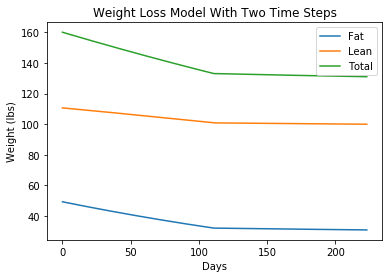

In [110]:
plt.figure(12)

#Set parameters
bw = 72.575
age = 38
H = 1.7272
sex = 'female'

#Get the y0 by getting the fat mass
fm = fat_mass(bw,age,H,sex)
y0 = [fm,bw-fm]
t = np.arange(0,112)
pal = 1.7
ei = 1600

#Get the solution to the first stage of weight loss
sol1 = solve_ivp(weight_odesystem2,[0,112],y0,t_eval=t)
pal = 1.5
ei = 2025

#Get hte new fat mass and weight loss
y0 = sol1.y[:,-1]

#Get hte solution to the second stage of weight loss
sol2 = solve_ivp(weight_odesystem2,[0,112],y0,t_eval=t)
sol = np.hstack((sol1.y,sol2.y))
full_time = np.arange(0,224)

#Plot the solution
plt.plot(full_time, kilo_to_lb(sol[0]), label = 'Fat')
plt.plot(full_time,kilo_to_lb(sol[1]), label = 'Lean')
plt.plot(full_time,kilo_to_lb(np.sum(sol,axis=0)),label='Total')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss Model With Two Time Steps')
plt.legend()
plt.show()